## TASK2 vars

In [1]:
from covid19dh import covid19
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [8]:
eu_codes = """Code	Country	Alpha-2	Alpha-3
040	Austria	AT	AUT
056	Belgium	BE	BEL
100	Bulgaria	BG	BGR
191	Croatia	HR	HRV
196	Cyprus	CY	CYP
203	Czech Republic	CZ	CZE
208	Denmark	DK	DNK
233	Estonia	EE	EST
246	Finland	FI	FIN
250	France	FR	FRA
276	Germany	DE	DEU
300	Greece	GR	GRC
348	Hungary	HU	HUN
372	Ireland, Republic of (EIRE)	IE	IRL
380	Italy	IT	ITA
428	Latvia	LV	LVA
440	Lithuania	LT	LTU
442	Luxembourg	LU	LUX
470	Malta	MT	MLT
528	Netherlands	NL	NLD
616	Poland	PL	POL
620	Portugal	PT	PRT
642	Romania	RO	ROU
703	Slovakia	SK	SVK
705	Slovenia	SI	SVN
724	Spain	ES	ESP
752	Sweden	SE	SWE
826	United Kingdom	GB	GBR"""

In [40]:
eu_codes = pd.DataFrame([i.split('\t') for i in eu_codes.split('\n')]).iloc[1:,:]

In [46]:
len(eu_codes[3])

28

In [53]:
# update the package 
!pip install --upgrade covid19dh

In [128]:
x, src = covid19(eu_codes[3], level = 2) 

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In [66]:
print('Available countries are:')
print(len(eu_codes[eu_codes[3].isin(src.iso_alpha_3.unique())]))
print()
eu_codes[eu_codes[3].isin(src.iso_alpha_3.unique())]

Available countries are:
12



,0,1,2,3
1,040,Austria,AT,AUT
2,056,Belgium,BE,BEL
6,203,Czech Republic,CZ,CZE
7,208,Denmark,DK,DNK
10,250,France,FR,FRA
11,276,Germany,DE,DEU
15,380,Italy,IT,ITA
16,428,Latvia,LV,LVA
17,440,Lithuania,LT,LTU
20,528,Netherlands,NL,NLD


In [117]:
x.query('iso_alpha_3 == "FRA"').columns

Index(['id', 'date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection',
       'government_response_index', 'stringency_index',
       'containment_health_index', 'economic_support_index',
       'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'population', 'iso_alpha_3', 'iso_alpha_2',
       'iso_numeric', 'iso_currency', 'key_local', 'key_google_mobility',
       'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_g

<AxesSubplot:xlabel='date'>

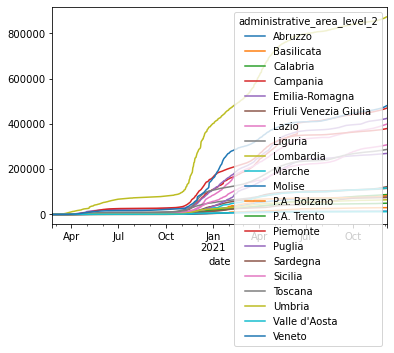

In [129]:
x.query('iso_alpha_3 == "ITA"').groupby(['date', 'administrative_area_level_2'])['recovered'].sum().unstack().plot()